## 1. Calculate Force Constant and Moment Constant

Average thrust coefficient (CT): 0.093786
Average torque coefficient (CQ): 0.005297
Average power coefficient (CP): 0.048968


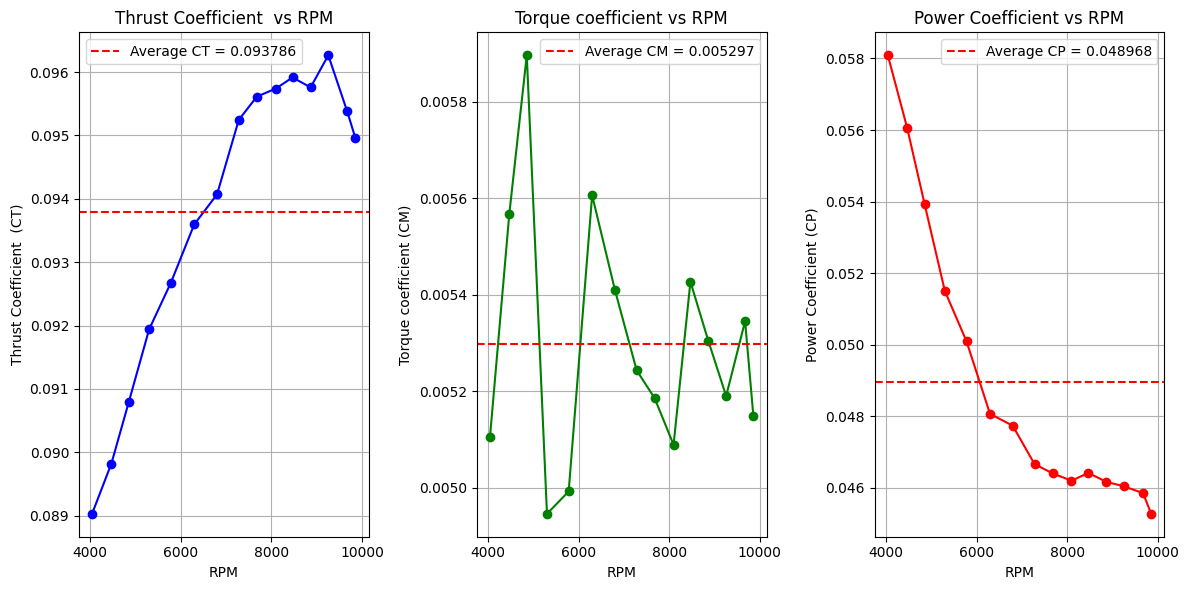

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
propeller_diameter = 0.254  # meters
air_density = 1.225         # kg/m³
two_pi = 3.14159265359 * 2

# https://repositorio-aberto.up.pt/bitstream/10216/144332/2/584886.pdf
# https://database.tytorobotics.com/tests/k9w/t-motor-2216-900kv-1045prop-4s
experiments = { # @ 16V
    "1": {"throttle": 30, "thrust": 210, "torque": 0.03, "rpm": 4042, "power": 23},
    "2": {"throttle": 35, "thrust": 259, "torque": 0.04, "rpm": 4469, "power": 30},
    "3": {"throttle": 40, "thrust": 309, "torque": 0.05, "rpm": 4855, "power": 37},
    "4": {"throttle": 45, "thrust": 373, "torque": 0.05, "rpm": 5301, "power": 46},
    "5": {"throttle": 50, "thrust": 447, "torque": 0.06, "rpm": 5780, "power": 58},
    "6": {"throttle": 55, "thrust": 536, "torque": 0.08, "rpm": 6298, "power": 72},
    "7": {"throttle": 60, "thrust": 628, "torque": 0.09, "rpm": 6800, "power": 90},
    "8": {"throttle": 65, "thrust": 729, "torque": 0.10, "rpm": 7281, "power": 108},
    "9": {"throttle": 70, "thrust": 814, "torque": 0.11, "rpm": 7679, "power": 126},
    "10": {"throttle": 75, "thrust": 906, "torque": 0.12, "rpm": 8096, "power": 147},
    "11": {"throttle": 80, "thrust": 993, "torque": 0.14, "rpm": 8468, "power": 169},
    "12": {"throttle": 85, "thrust": 1087, "torque": 0.15, "rpm": 8867, "power": 193},
    "13": {"throttle": 90, "thrust": 1191, "torque": 0.16, "rpm": 9257, "power": 219},
    "14": {"throttle": 95, "thrust": 1289, "torque": 0.18, "rpm": 9675, "power": 249},
    "15": {"throttle": 100, "thrust": 1332, "torque": 0.18, "rpm": 9857, "power": 260}
}

# Extract and convert data
rpms = np.array([exp["rpm"] for exp in experiments.values()])
thrusts = np.array([exp["thrust"] for exp in experiments.values()]) / 1000  # convert g to kg
torques = np.array([exp["torque"] for exp in experiments.values()])
powers = np.array([exp["power"] for exp in experiments.values()])

# Calculate angular velocities
angular_velocities = rpms * 2 * np.pi / 60  # convert RPM to rad/s

# Calculate thrust coefficient (CT)
# T = CT * ρ * n² * D⁴
# where T is thrust, ρ is air density, n is rotations per second, D is diameter
n = rpms / 60  # convert RPM to RPS
thrust_coefficient = thrusts * 9.81 / (air_density * n**2 * propeller_diameter**4)

# Calculate torque coefficient (CQ)
# M = CQ * ρ * n² * D⁵
torque_coefficient = torques / (air_density * n**2 * propeller_diameter**5)

# Calculate power coefficient (CP)
# P = CP * ρ * n³ * D⁵
power_coefficient = powers / (air_density * n**3 * propeller_diameter**5)

# Calculate average coefficients
avg_thrust_coefficient = np.mean(thrust_coefficient)
avg_torque_coefficient = np.mean(torque_coefficient)
avg_power_coefficient = np.mean(power_coefficient)

print(f"Average thrust coefficient (CT): {avg_thrust_coefficient:.6f}")
print(f"Average torque coefficient (CQ): {avg_torque_coefficient:.6f}")
print(f"Average power coefficient (CP): {avg_power_coefficient:.6f}")

# Plot the constants to check consistency
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(rpms, thrust_coefficient, 'bo-')
plt.axhline(y=avg_thrust_coefficient, color='r', linestyle='--', label=f'Average CT = {avg_thrust_coefficient:.6f}')
plt.xlabel('RPM')
plt.ylabel('Thrust Coefficient  (CT)')
plt.title('Thrust Coefficient  vs RPM')
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(rpms, torque_coefficient, 'go-')
plt.axhline(y=avg_torque_coefficient, color='r', linestyle='--', label=f'Average CM = {avg_torque_coefficient:.6f}')
plt.xlabel('RPM')
plt.ylabel('Torque coefficient (CM)')
plt.title('Torque coefficient vs RPM')
plt.grid(True)
plt.legend()

plt.subplot(133)
plt.plot(rpms, power_coefficient, 'ro-')
plt.axhline(y=avg_power_coefficient, color='r', linestyle='--', label=f'Average CP = {avg_power_coefficient:.6f}')
plt.xlabel('RPM')
plt.ylabel('Power Coefficient (CP)')
plt.title('Power Coefficient vs RPM')
plt.grid(True)
plt.legend()

plt.tight_layout()

Average force constant: 0.000012112961 N/(rad/s)²
Average moment constant: 0.000000173772 N⋅m/(rad/s)²


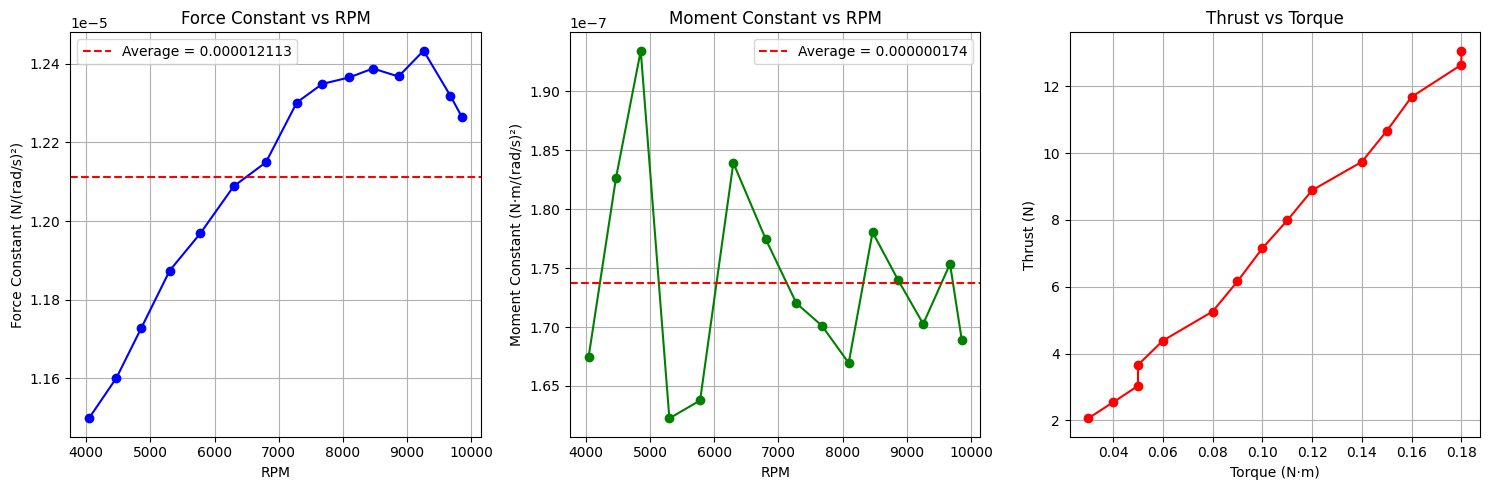

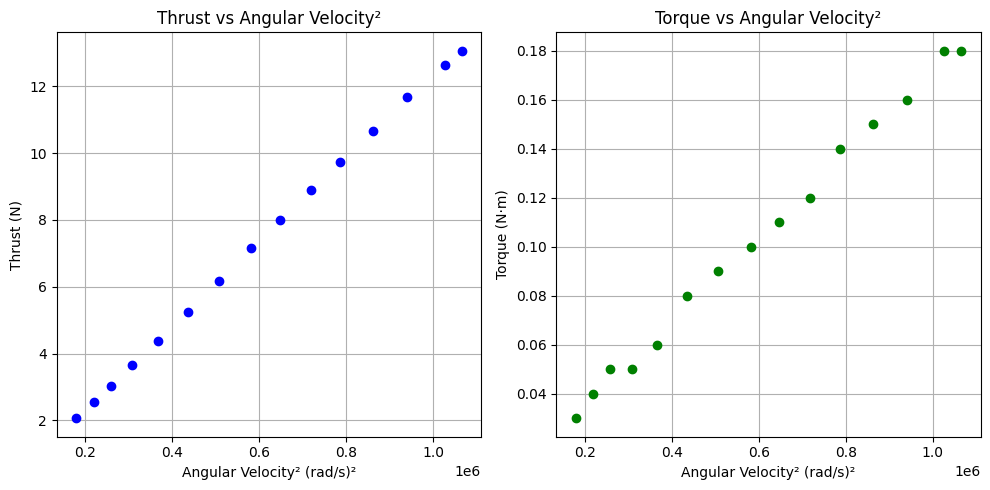

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants from your code
propeller_diameter = 0.254  # meters
air_density = 1.225         # kg/m³
two_pi = 3.14159265359 * 2

# https://repositorio-aberto.up.pt/bitstream/10216/144332/2/584886.pdf
# https://database.tytorobotics.com/tests/k9w/t-motor-2216-900kv-1045prop-4s
experiments = { # @ 16V
    "1": {"throttle": 30, "thrust": 210, "torque": 0.03, "rpm": 4042, "power": 23},
    "2": {"throttle": 35, "thrust": 259, "torque": 0.04, "rpm": 4469, "power": 30},
    "3": {"throttle": 40, "thrust": 309, "torque": 0.05, "rpm": 4855, "power": 37},
    "4": {"throttle": 45, "thrust": 373, "torque": 0.05, "rpm": 5301, "power": 46},
    "5": {"throttle": 50, "thrust": 447, "torque": 0.06, "rpm": 5780, "power": 58},
    "6": {"throttle": 55, "thrust": 536, "torque": 0.08, "rpm": 6298, "power": 72},
    "7": {"throttle": 60, "thrust": 628, "torque": 0.09, "rpm": 6800, "power": 90},
    "8": {"throttle": 65, "thrust": 729, "torque": 0.10, "rpm": 7281, "power": 108},
    "9": {"throttle": 70, "thrust": 814, "torque": 0.11, "rpm": 7679, "power": 126},
    "10": {"throttle": 75, "thrust": 906, "torque": 0.12, "rpm": 8096, "power": 147},
    "11": {"throttle": 80, "thrust": 993, "torque": 0.14, "rpm": 8468, "power": 169},
    "12": {"throttle": 85, "thrust": 1087, "torque": 0.15, "rpm": 8867, "power": 193},
    "13": {"throttle": 90, "thrust": 1191, "torque": 0.16, "rpm": 9257, "power": 219},
    "14": {"throttle": 95, "thrust": 1289, "torque": 0.18, "rpm": 9675, "power": 249},
    "15": {"throttle": 100, "thrust": 1332, "torque": 0.18, "rpm": 9857, "power": 260}
}

# Extract and convert data
rpms = np.array([exp["rpm"] for exp in experiments.values()])
thrusts = np.array([exp["thrust"] for exp in experiments.values()]) / 1000  # convert g to kg
torques = np.array([exp["torque"] for exp in experiments.values()])
powers = np.array([exp["power"] for exp in experiments.values()])

# Calculate angular velocities
angular_velocities = rpms * 2 * np.pi / 60  # convert RPM to rad/s

# Calculate force constants for each data point
force_constants = (thrusts * 9.81) / (angular_velocities ** 2)  # N/(rad/s)²

# Calculate moment constants for each data point
moment_constants = torques / (angular_velocities ** 2)  # N⋅m/(rad/s)²

# Calculate average constants
avg_force_constant = np.mean(force_constants)
avg_moment_constant = np.mean(moment_constants)

print(f"Average force constant: {avg_force_constant:.12f} N/(rad/s)²")
print(f"Average moment constant: {avg_moment_constant:.12f} N⋅m/(rad/s)²")

# Create plots
plt.figure(figsize=(15, 5))

# Plot 1: Force Constant vs RPM
plt.subplot(131)
plt.plot(rpms, force_constants, 'bo-')
plt.axhline(y=avg_force_constant, color='r', linestyle='--',
            label=f'Average = {avg_force_constant:.9f}')
plt.xlabel('RPM')
plt.ylabel('Force Constant (N/(rad/s)²)')
plt.title('Force Constant vs RPM')
plt.grid(True)
plt.legend()

# Plot 2: Moment Constant vs RPM
plt.subplot(132)
plt.plot(rpms, moment_constants, 'go-')
plt.axhline(y=avg_moment_constant, color='r', linestyle='--',
            label=f'Average = {avg_moment_constant:.9f}')
plt.xlabel('RPM')
plt.ylabel('Moment Constant (N⋅m/(rad/s)²)')
plt.title('Moment Constant vs RPM')
plt.grid(True)
plt.legend()

# Plot 3: Thrust vs Torque
plt.subplot(133)
plt.plot(torques, thrusts * 9.81, 'ro-')
plt.xlabel('Torque (N⋅m)')
plt.ylabel('Thrust (N)')
plt.title('Thrust vs Torque')
plt.grid(True)

plt.tight_layout()
plt.show()

# Verification plots
plt.figure(figsize=(15, 5))

# Plot 1: Thrust vs Angular Velocity²
plt.subplot(131)
plt.plot(angular_velocities**2, thrusts * 9.81, 'bo')
plt.xlabel('Angular Velocity² (rad/s)²')
plt.ylabel('Thrust (N)')
plt.title('Thrust vs Angular Velocity²')
plt.grid(True)

# Plot 2: Torque vs Angular Velocity²
plt.subplot(132)
plt.plot(angular_velocities**2, torques, 'go')
plt.xlabel('Angular Velocity² (rad/s)²')
plt.ylabel('Torque (N⋅m)')
plt.title('Torque vs Angular Velocity²')
plt.grid(True)

plt.tight_layout()
plt.show()

## 2. Camera Focal/Aperture
- https://docs.omniverse.nvidia.com/isaacsim/latest/features/environment_setup/assets/usd_assets_sensors.html?highlight=camera#zed-x-certified-by-stereolabs
- https://www.stereolabs.com/en-my/products/zed-x 
- https://www.onsemi.com/products/sensors/image-sensors/AR0234AT (most likely for ZEDX)
- https://www.stereolabs.com/en-my/store/products/zed-mini
- https://www.ovt.com/products/ov4686/ (most likely for ZED-mini)

### ZED-mini calibration file parameters, taken from ZED SDK
see SN15043860.conf

In [1]:
import math
''' ZED-Mini
Aperture = ƒ/2.0
Focal Length = 2.8mm
Field of View = 102° (H) x 57° (V) x 118° (D) max.
'''
# Given values
focal_length = 2.8  # in mm
fov_horizontal = 102  # in degrees
fov_vertical = 57 # in degrees

# Converting FOV from degrees to radians for calculation
fov_horizontal_rad = math.radians(fov_horizontal)
fov_vertical_rad = math.radians(fov_vertical)

# Calculating the horizontal and vertical sensor dimensions (apertures)
sensor_width = 2 * focal_length * math.tan(fov_horizontal_rad / 2)
sensor_height = 2 * focal_length * math.tan(fov_vertical_rad / 2)

sensor_width, sensor_height

print(f"Horizontal aperture ZED-mini: {sensor_width}")
print(f"Vertical aperture ZED-mini: {sensor_height}")

''' ZEDX
Aperture = ƒ/2.2 (2.2mm)
Focal Length = 2.2mm
Field of View = 110 (H) x 80 (V) x 120° (D) max. (for 2.2mm)
'''
sensor_width, sensor_height = 5.760000228881836, 3.240000009536743 # why so off for isaac sim usd?
focal_length = 2.2079999446868896

fov_horizontal = 2 * math.degrees(math.atan(sensor_width / (2 * focal_length)))
fov_vertical = 2 * math.degrees(math.atan(sensor_height / (2 * focal_length)))

print(f"FOV Horizontal ZEDX: {fov_horizontal} degrees")
print(f"FOV Vertical ZEDX: {fov_vertical} degrees")

Horizontal aperture ZED-mini: 6.915424076596288
Vertical aperture ZED-mini: 3.0405519179752467
FOV Horizontal ZEDX: 105.04764446205108 degrees
FOV Vertical ZEDX: 72.53467148240144 degrees


In [ ]:
# Sensor 	OV2710
# Lens Size 	1/2.7 inches
# Pixel Size 	3.0um X 3.0um
# image area 	5856 µm x 3276 µm
# Max. Resolution 	FULL HD 1920(H)X1080(V)
# Compression format 	MJPEG / YUV2（YUYV）
# Resolution & frame 	320X240 QVGA MJPEG @120fps/ 352X288 CIF MJPEG @120fps
# 640X480 VGA MJPEG@120fps/ 800X600 SVGA MJPEG@60fps
# 1024X768 XGA MJPEG@30fps/ 1280X720 HD MJPEG@60fps
# 1280X1024 SXGA MJPEG@30fps/ 1920X1080 FHD MJPEG@30fps

In [ ]:
# https://docs.omniverse.nvidia.com/isaacsim/latest/features/sensors_simulation/isaac_sim_sensors_camera.html?highlight=focus#calibrated-camera-sensors
# OpenCV camera matrix and width and height of the camera sensor, from the calibration file
width_hd, height_hd = 1280, 720
camera_matrix_l_hd = [[771.35, 0.0, 641.15], [0.0, 771.345, 352.175], [0.0, 0.0, 1.0]]
camera_matrix_r_hd = [[771.665, 0.0, 653.57], [0.0, 771.505, 356.336], [0.0, 0.0, 1.0]]

# Pixel size in microns, aperture and focus distance from the camera sensor specification
# Note: to disable the depth of field effect, set the f_stop to 0.0. This is useful for debugging.
pixel_size = 2 * 1e-3   # in mm, 2 microns is a common pixel size for high resolution cameras
f_stop = 2.0            # f-number, the ratio of the lens focal length to the diameter of the entrance pupil
focus_distance = 0.6    # in meters, the distance from the camera to the object plane

# Calculate the focal length and aperture size from the camera matrix
((fx,_,cx),(_,fy,cy),(_,_,_)) = camera_matrix_l_hd
horizontal_aperture =  pixel_size * width_hd                   # The aperture size in mm
vertical_aperture =  pixel_size * height_hd
focal_length_x  = fx * pixel_size
focal_length_y  = fy * pixel_size
focal_length = (focal_length_x + focal_length_y) / 2         # The focal length in mm

# Set the camera parameters, note the unit conversion between Isaac Sim sensor and Kit
print(f"focal_length : {focal_length/ 10.0}")                # Convert from mm to cm (or 1/10th of a world unit)
print(f"focus_distance : {focus_distance}")                  # The focus distance in meters
print(f"lens_aperture : {f_stop * 100.0}")                   # Convert the f-stop to Isaac Sim units
print(f"horizontal_aperture : {horizontal_aperture / 10.0}") # Convert from mm to cm (or 1/10th of a world unit)
print(f"vertical_aperture : {vertical_aperture / 10.0}")

In [4]:
import torch
def quat_rotate(q: torch.Tensor, v: torch.Tensor) -> torch.Tensor:
    """Rotate a vector by a quaternion along the last dimension of q and v.

    Args:
        q: The quaternion in (w, x, y, z). Shape is (..., 4).
        v: The vector in (x, y, z). Shape is (..., 3).

    Returns:
        The rotated vector in (x, y, z). Shape is (..., 3).
    """
    q_w = q[..., 0]
    q_vec = q[..., 1:]
    a = v * (2.0 * q_w**2 - 1.0).unsqueeze(-1)
    b = torch.cross(q_vec, v, dim=-1) * q_w.unsqueeze(-1) * 2.0
    # for two-dimensional tensors, bmm is faster than einsum
    if q_vec.dim() == 2:
        c = q_vec * torch.bmm(q_vec.view(q.shape[0], 1, 3), v.view(q.shape[0], 3, 1)).squeeze(-1) * 2.0
    else:
        c = q_vec * torch.einsum("...i,...i->...", q_vec, v).unsqueeze(-1) * 2.0
    return a + b + c

def quat_mul(q1: torch.Tensor, q2: torch.Tensor) -> torch.Tensor:
    """Multiply two quaternions together.

    Args:
        q1: The first quaternion in (w, x, y, z). Shape is (..., 4).
        q2: The second quaternion in (w, x, y, z). Shape is (..., 4).

    Returns:
        The product of the two quaternions in (w, x, y, z). Shape is (..., 4).

    Raises:
        ValueError: Input shapes of ``q1`` and ``q2`` are not matching.
    """
    # check input is correct
    if q1.shape != q2.shape:
        msg = f"Expected input quaternion shape mismatch: {q1.shape} != {q2.shape}."
        raise ValueError(msg)
    # reshape to (N, 4) for multiplication
    shape = q1.shape
    q1 = q1.reshape(-1, 4)
    q2 = q2.reshape(-1, 4)
    # extract components from quaternions
    w1, x1, y1, z1 = q1[:, 0], q1[:, 1], q1[:, 2], q1[:, 3]
    w2, x2, y2, z2 = q2[:, 0], q2[:, 1], q2[:, 2], q2[:, 3]
    # perform multiplication
    ww = (z1 + x1) * (x2 + y2)
    yy = (w1 - y1) * (w2 + z2)
    zz = (w1 + y1) * (w2 - z2)
    xx = ww + yy + zz
    qq = 0.5 * (xx + (z1 - x1) * (x2 - y2))
    w = qq - ww + (z1 - y1) * (y2 - z2)
    x = qq - xx + (x1 + w1) * (x2 + w2)
    y = qq - yy + (w1 - x1) * (y2 + z2)
    z = qq - zz + (z1 + y1) * (w2 - x2)

    return torch.stack([w, x, y, z], dim=-1).view(shape)

pos = torch.tensor([1.0, 0, 0])
quat = torch.tensor([0.99619, 0, 0, 0.08716])

offset_pos = torch.tensor([1.0, 0, 0])
offset_quat = torch.tensor([0.87758, 0.47943, 0, 0])

pos = pos + quat_rotate(quat, offset_pos)
quat = quat_mul(quat, offset_quat)

print(pos)
print(quat)

tensor([1.9848, 0.1737, 0.0000])
tensor([0.8742, 0.4776, 0.0418, 0.0765])


Text(0.35, 0.7, 'Constant velocity region')

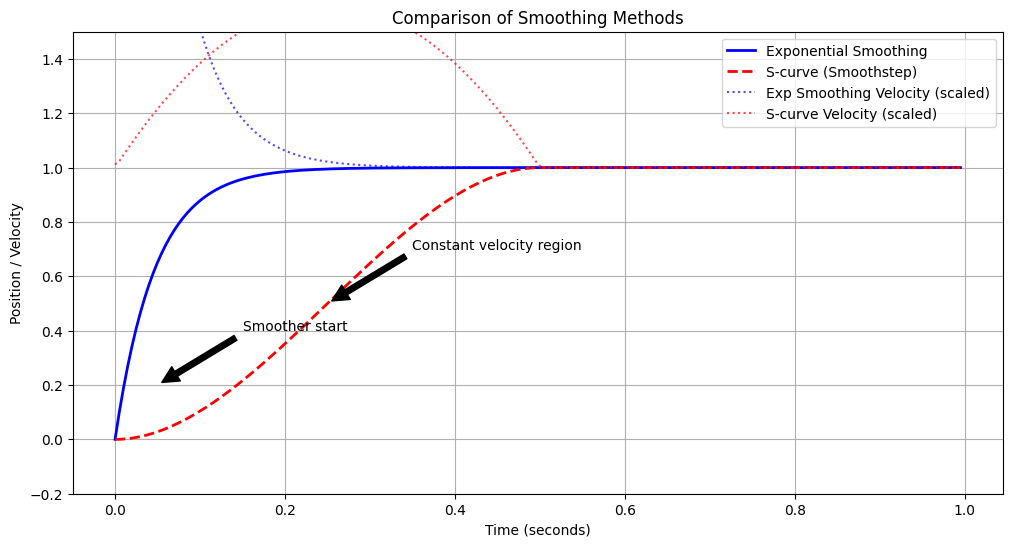

In [1]:
# Motion Profile
import numpy as np
import matplotlib.pyplot as plt

# Time settings
dt = 1/200  # 200Hz
t = np.arange(0, 1, dt)

# Initial and target positions
start = 0
target = 1

# Exponential smoothing (your current approach)
def exp_smoothing(tau):
    pos = np.zeros_like(t)
    pos[0] = start
    cmd = target
    for i in range(1, len(t)):
        pos[i] = pos[i-1] + tau * (np.sqrt(abs(cmd)) - pos[i-1])
    return pos

# S-curve (smoothstep)
def s_curve(t_norm):
    return t_norm * t_norm * (3 - 2 * t_norm)

# Generate curves
tau = 0.1
exp_curve = exp_smoothing(tau)

t_norm = np.clip(t/0.5, 0, 1)  # Normalize time to [0,1] over 0.5s
s_curve_pos = start + (target - start) * s_curve(t_norm)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, exp_curve, 'b-', label='Exponential Smoothing', linewidth=2)
plt.plot(t, s_curve_pos, 'r--', label='S-curve (Smoothstep)', linewidth=2)

# Add velocity curves (first derivative)
vel_exp = np.gradient(exp_curve, dt)
vel_s = np.gradient(s_curve_pos, dt)

plt.plot(t, vel_exp/5 + target, 'b:', label='Exp Smoothing Velocity (scaled)', alpha=0.7)
plt.plot(t, vel_s/5 + target, 'r:', label='S-curve Velocity (scaled)', alpha=0.7)

plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Position / Velocity')
plt.title('Comparison of Smoothing Methods')
plt.legend()
plt.ylim(-0.2, 1.5)

# Add annotations
plt.annotate('Smoother start', xy=(0.05, 0.2), xytext=(0.15, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Constant velocity region', xy=(0.25, 0.5), xytext=(0.35, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))